In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [3]:
df = pd.read_csv(r'C:\Users\SH2\Downloads\archive (19)\StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploring the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.shape

(1000, 8)

In [7]:
df.isnull().sum() # No null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df[df.duplicated()] # No duplicated rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [15]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [20]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [22]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## Analyzing The Dataset

In [25]:
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.09,15.16,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.17,14.60,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.05,15.20,10.0,57.75,69.0,79.0,100.0


### Explore math Score First

<AxesSubplot:xlabel='math score', ylabel='Count'>

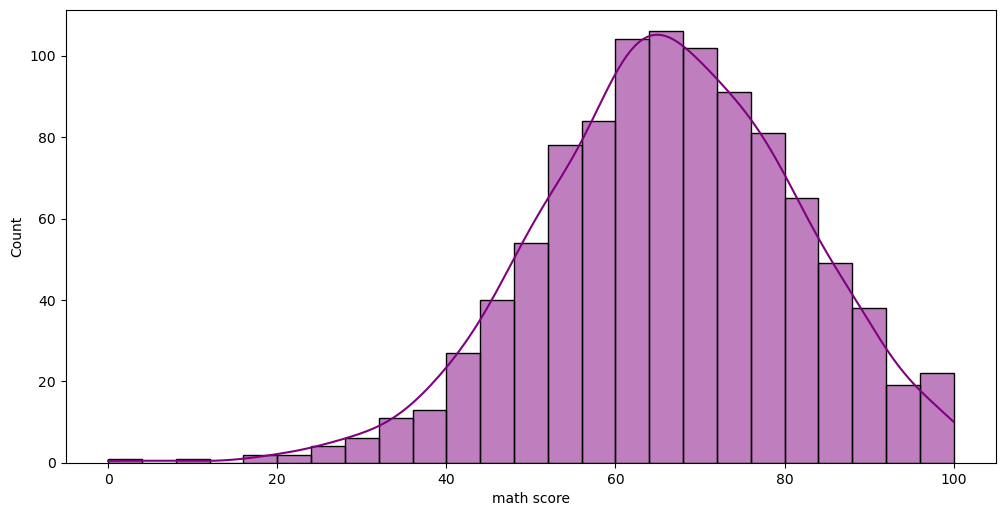

In [41]:
plt.figure(figsize=(12,6),dpi =100)
sns.histplot(data =df['math score'],kde =True,color="purple")


<AxesSubplot:xlabel='math score'>

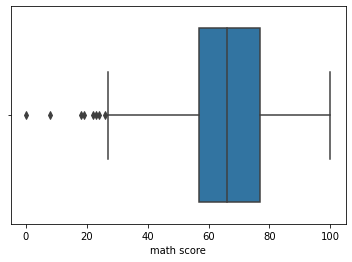

In [40]:
sns.boxplot(x=df['math score'])

## how many students passed in the exam

In [42]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [50]:
passmark = 50
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

C:\Users\SH2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Math_PassStatus', ylabel='count'>

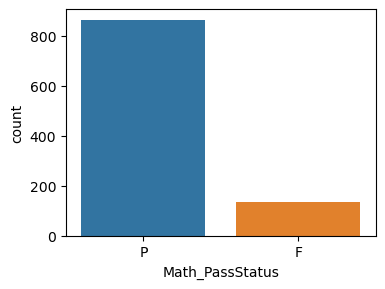

In [56]:
plt.figure(figsize =(4,3),dpi =100)
sns.countplot(df['Math_PassStatus'])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

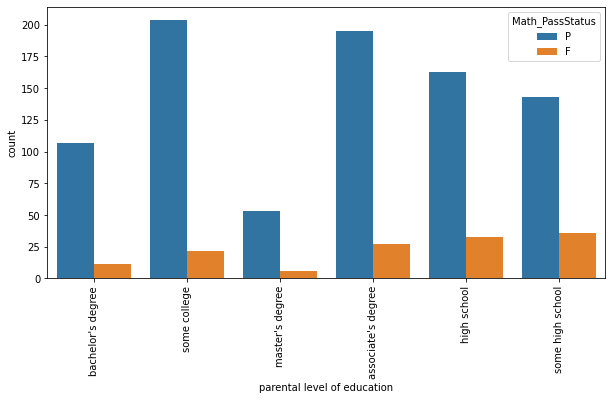

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'parental level of education',data =df,hue ='Math_PassStatus')
plt.xticks(rotation =90)

<AxesSubplot:xlabel='math score', ylabel='Density'>

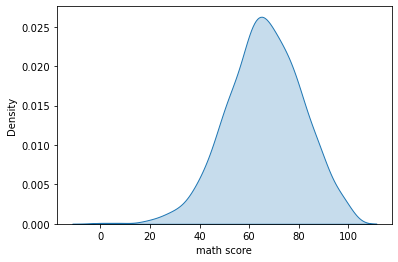

In [63]:

sns.kdeplot(df['math score'],shade =True)

In [85]:
df[(df['test preparation course']== 'completed') & (df['math score'] <50)].count()['math score']

28

In [86]:
df[(df['test preparation course']== 'completed') & (df['math score'] >50)].count()['math score']

325

In [70]:
df[df['test preparation course']== 'none']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P
5,female,group B,associate's degree,standard,none,71,83,78,P
...,...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76,P
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,P
994,male,group A,high school,standard,none,63,63,62,P
996,male,group C,high school,free/reduced,none,62,55,55,P


In [88]:
df.groupby('race/ethnicity')['math score'].mean()

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

<AxesSubplot:xlabel='reading score', ylabel='Count'>

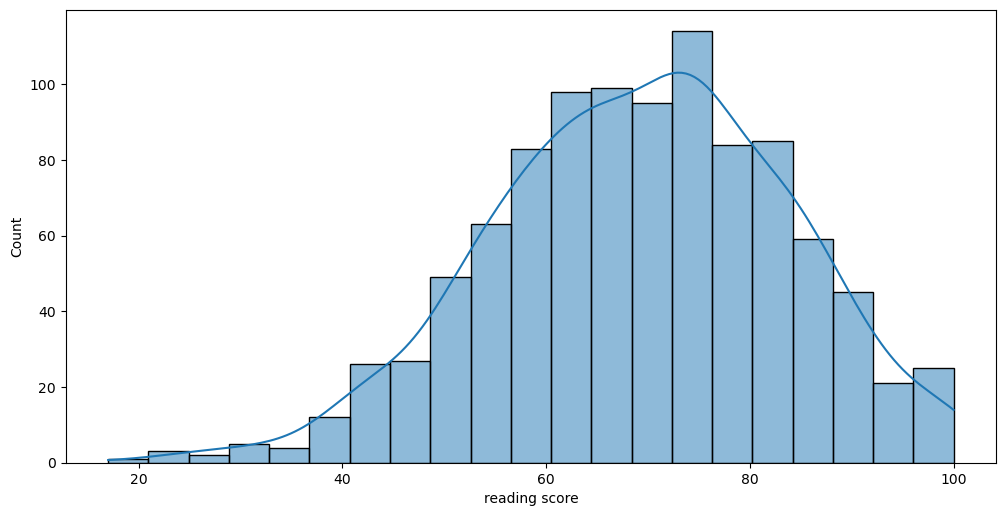

In [89]:
plt.figure(figsize=(12,6),dpi =100)
sns.histplot(data =df['reading score'],kde =True)


C:\Users\SH2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score'>

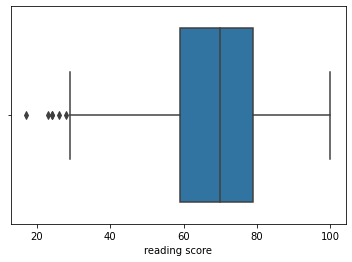

In [90]:
sns.boxplot(df['reading score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

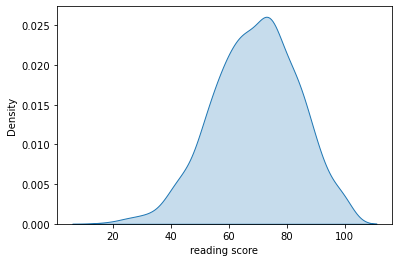

In [91]:
sns.kdeplot(df['reading score'],shade =True)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

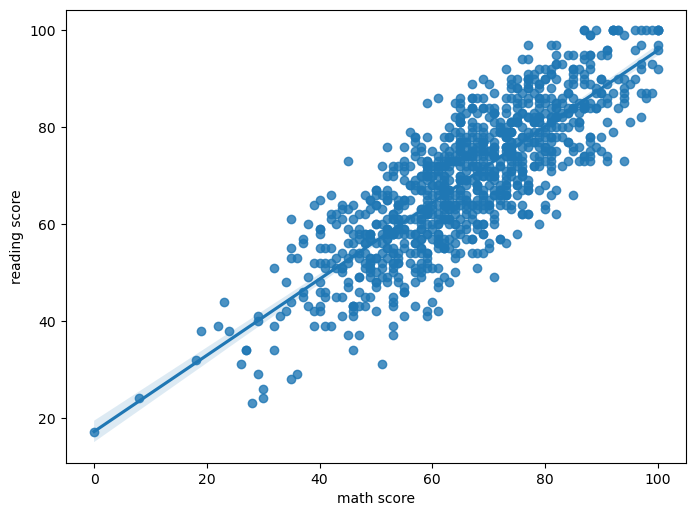

In [94]:
plt.figure(figsize=(8,6),dpi =100)
sns.regplot(x='math score',y='reading score',data=df)

In [95]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P


In [109]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,229,76.333333


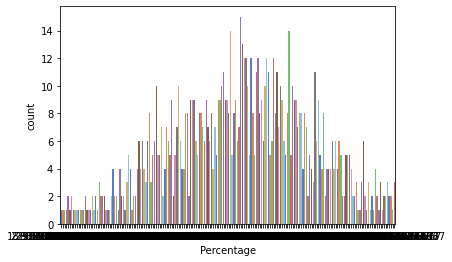

In [110]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

In [111]:
passmark = 50
df['reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

In [112]:
passmark = 50
df['writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    865
F    135
Name: Math_PassStatus, dtype: int64

In [116]:
df['overall_pass'] = df.apply(lambda x:'F' if x['Math_PassStatus'] == 'F' 
 or x['reading score'] =='F' or x['writing score'] =='F'
else'P',axis =1)
df.overall_pass.value_counts()

P    865
F    135
Name: overall_pass, dtype: int64

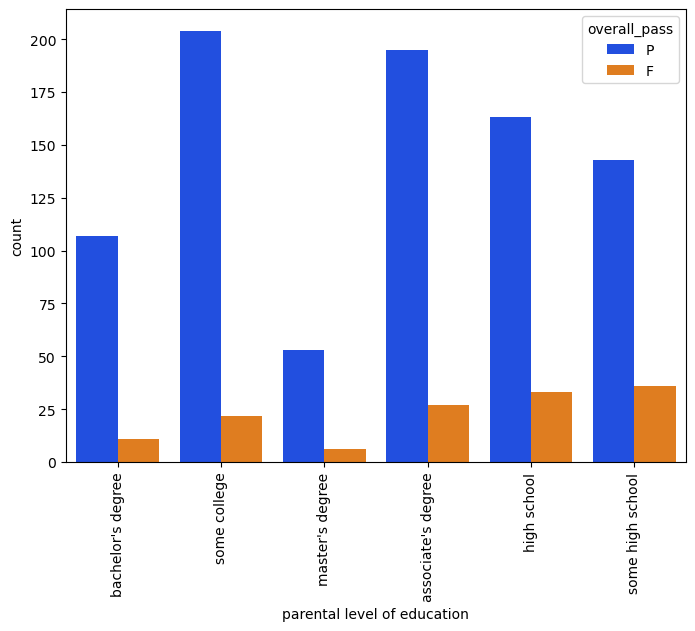

In [121]:
plt.figure(figsize=(8,6),dpi =100)
sns.countplot(x ='parental level of education',data =df,hue='overall_pass',palette='bright')
plt.xticks(rotation =90)
plt.show()

In [122]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Total_Marks,Percentage,reading_PassStatus,writing_PassStatus,overall_pass
0,female,group B,bachelor's degree,standard,none,72,72,74,P,218,72.666667,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,247,82.333333,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,278,92.666667,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,148,49.333333,P,F,F
4,male,group C,some college,standard,none,76,78,75,P,229,76.333333,P,P,P


In [126]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['overall_pass']), axis=1)

df.Grade.value_counts()

B    261
C    255
A    198
F    136
D    128
E     22
Name: Grade, dtype: int64

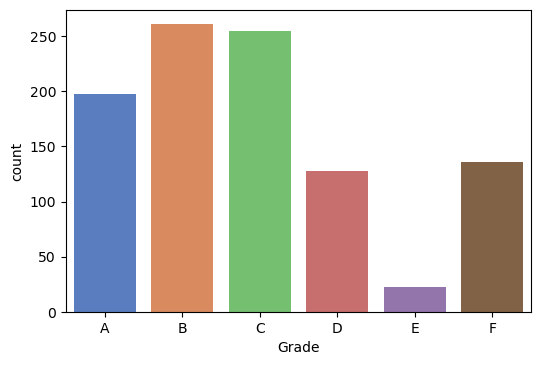

In [128]:
plt.figure(dpi=100)
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

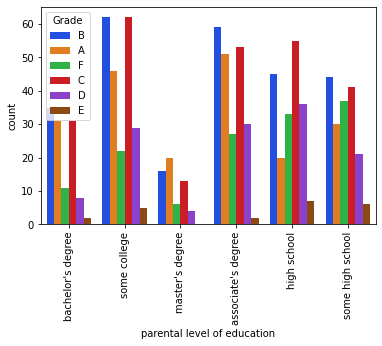

In [130]:
sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
plt.xticks(rotation=90)